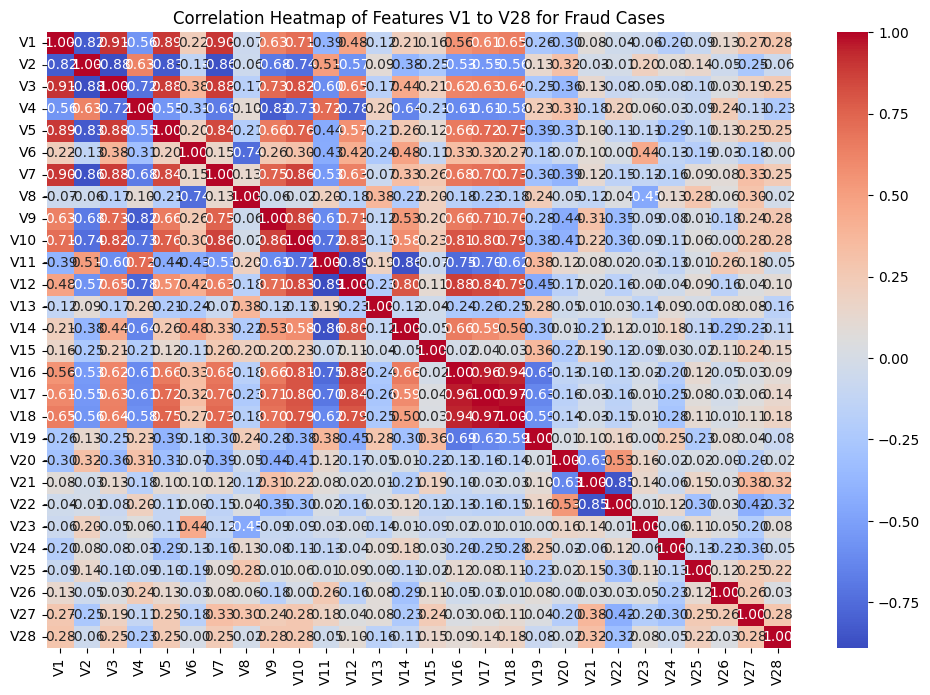

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Filter fraud cases
fraud_data = data[data['Class'] == 1]

# Select features V1 to V28
features = fraud_data.iloc[:, 1:29]

# Calculate correlation matrix
correlation_matrix = features.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features V1 to V28 for Fraud Cases')
plt.show()


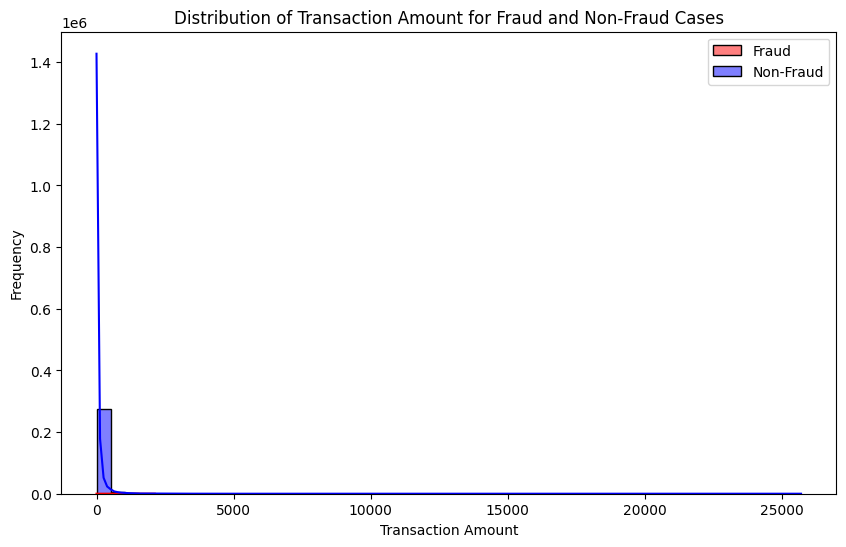

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Filter fraud and non-fraud cases
fraud_data = data[data['Class'] == 1]
non_fraud_data = data[data['Class'] == 0]

# Plot distribution of transaction amount for fraud and non-fraud cases
plt.figure(figsize=(10, 6))
sns.histplot(fraud_data['Amount'], bins=50, kde=True, color='red', label='Fraud')
sns.histplot(non_fraud_data['Amount'], bins=50, kde=True, color='blue', label='Non-Fraud')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amount for Fraud and Non-Fraud Cases')
plt.legend()
plt.show()


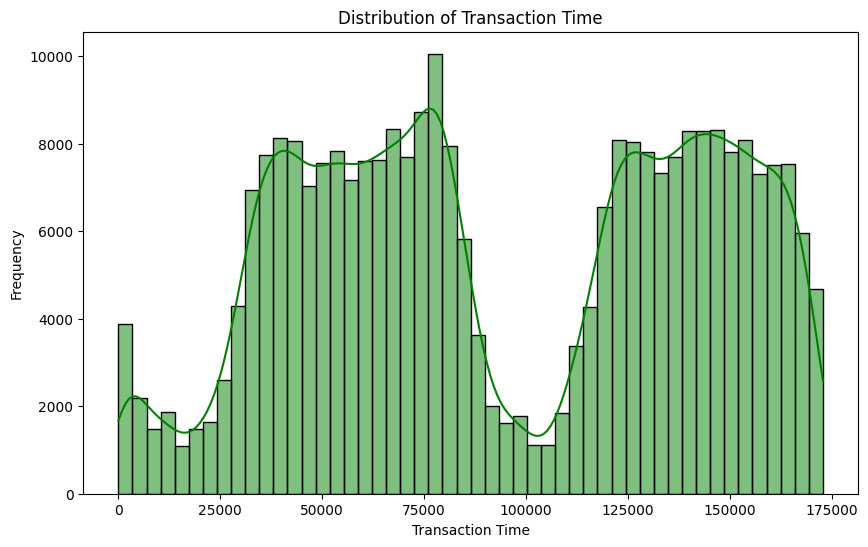

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Plot distribution of transaction time
plt.figure(figsize=(10, 6))
sns.histplot(data['Time'], bins=50, kde=True, color='green')
plt.xlabel('Transaction Time')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Time')
plt.show()


In [1]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Step 2: Load the dataset
data = pd.read_csv('creditcard.csv')

# Step 3: Preprocess the data
# Normalize the features (excluding the target variable 'Class')
scaler = StandardScaler()
data[['Amount']] = scaler.fit_transform(data[['Amount']])

# Step 4: Handle class imbalance
# Split the data into features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 6: Handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Step 7: Train classification models
# Logistic Regression with increased max_iter
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_res, y_train_res)

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_res, y_train_res)

# Step 8: Evaluate model performance
# Predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)

# Evaluation metrics for Logistic Regression
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))

# Evaluation metrics for Random Forest
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.14      0.85      0.25       148

    accuracy                           0.99     85443
   macro avg       0.57      0.92      0.62     85443
weighted avg       1.00      0.99      0.99     85443

[[84546   749]
 [   22   126]]
Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.84      0.80      0.82       148

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

[[85273    22]
 [   30   118]]


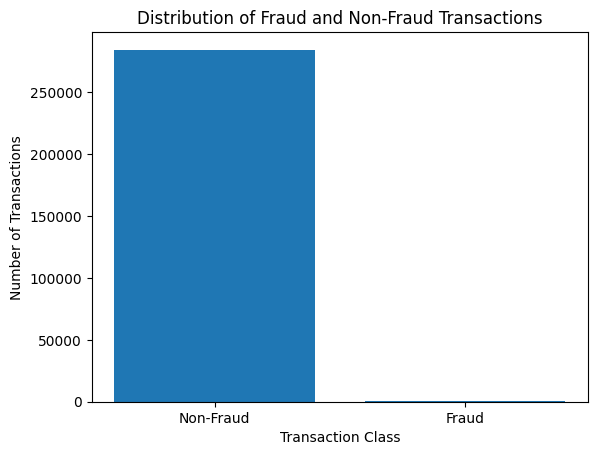

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Count the number of fraud and non-fraud cases
fraud_counts = data['Class'].value_counts()

# Create a bar plot
plt.bar(['Non-Fraud', 'Fraud'], fraud_counts)
plt.xlabel('Transaction Class')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Fraud and Non-Fraud Transactions')
plt.show()